<h1><center><font color = "red">Jupyter Notebook for Recurrent Neural Network Implementation in Keras</font></center></h1>

## Dataset Information:

•	Let us take a very famous dataset for sentiment analysis called as IMDB  Large Movie Review Dataset.


•	It is a dataset o for binary sentiment classification containing 25,000 highly polar movie reviews for training, and 25,000 for testing. 

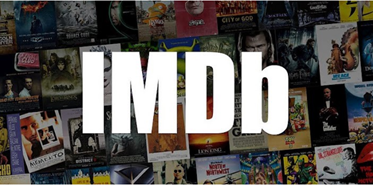

## Step 1. Loading Dataset from Keras

In [1]:
import numpy as np
from keras.datasets import imdb

vocabulary_size = 5000

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = vocabulary_size)
print('Loaded dataset with {} training samples, {} test samples'.format(len(input_train), len(input_test)))

2023-10-05 17:49:57.634961: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


17464789/17464789 [==============================] - 1s 0us/step
Loaded dataset with 25000 training samples, 25000 test samples


In [2]:
word2id = imdb.get_word_index()
word2id

1641221/1641221 [==============================] - 0s 0us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [3]:
id2word = {i: word for word, i in word2id.items()}
print('---review with words---')
print([id2word.get(i, ' ') for i in input_train[6]])

print('---label---')
print(y_train[6])


---review with words---
['the', 'and', 'full', 'involving', 'to', 'impressive', 'boring', 'this', 'as', 'and', 'and', 'br', 'villain', 'and', 'and', 'need', 'has', 'of', 'costumes', 'b', 'message', 'to', 'may', 'of', 'props', 'this', 'and', 'and', 'concept', 'issue', 'and', 'to', "god's", 'he', 'is', 'and', 'unfolds', 'movie', 'women', 'like', "isn't", 'surely', "i'm", 'and', 'to', 'toward', 'in', "here's", 'for', 'from', 'did', 'having', 'because', 'very', 'quality', 'it', 'is', 'and', 'and', 'really', 'book', 'is', 'both', 'too', 'worked', 'carl', 'of', 'and', 'br', 'of', 'reviewer', 'closer', 'figure', 'really', 'there', 'will', 'and', 'things', 'is', 'far', 'this', 'make', 'mistakes', 'and', 'was', "couldn't", 'of', 'few', 'br', 'of', 'you', 'to', "don't", 'female', 'than', 'place', 'she', 'to', 'was', 'between', 'that', 'nothing', 'and', 'movies', 'get', 'are', 'and', 'br', 'yes', 'female', 'just', 'its', 'because', 'many', 'br', 'of', 'overly', 'to', 'descent', 'people', 'time', 

#### We have maped the review to the original words and also revealed it's label. It can be seen that lable is 1, which means it is a positive review

In [4]:
print('Maximum review length: {}'.format(
len(max((input_train + input_test), key=len))))

Maximum review length: 2697


In [5]:
print('Minimum review length: {}'.format(
len(min((input_test + input_test), key=len))))

Minimum review length: 14


## Step. 2 Adding Pad Sequence

#### In order to feed this data into our RNN, all input documents must have the same length. We will limit the maximum review length to max_words by truncating longer reviews and padding shorter reviews with a null value (0)

In [6]:
from keras.utils import pad_sequences

max_words = 2697
input_train = pad_sequences(input_train, maxlen=max_words)
input_test = pad_sequences(input_test, maxlen=max_words)
print('Pad sequences (samples x time)')


#input_train = pad_sequences(input_train, maxlen=max_words)
#input_test = pad_sequences(input_test, maxlen=max_words)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Pad sequences (samples x time)
input_train shape: (25000, 2697)
input_test shape: (25000, 2697)


In [7]:
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}
print('---review with words---')
print([id2word.get(i, ' ') for i in input_train[6]])
print('---label---')
print(y_train[6])

---review with words---
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 

In [8]:
print('Maximum review length: {}'.format(
len(max((input_train + input_test), key=len))))

Maximum review length: 2697


In [9]:
print('Minimum review length: {}'.format(
len(min((input_test + input_test), key=len))))

Minimum review length: 2697


## Step 3. Defining Model Using Keras

In [10]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import Dense
max_features = 10000 #This variable sets the maximum number of words to consider as features. 
#It means the model will only use the top 10,000 most frequent words in the dataset and ignore less frequent words.
model = Sequential()
model.add(Embedding(max_features, 32)) # This adds an embedding layer to the model. 
#The embedding layer will convert the input sequence of word indices into dense vectors of fixed size, here 32.
model.add(SimpleRNN(32)) #This adds a Simple Recurrent Neural Network (RNN) layer with 32 hidden units. 
#RNNs are used to process sequences of data by maintaining a hidden state across timesteps
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Step 4. Compiling and Fitting Model

In [12]:
#Compiling Model
model.compile(optimizer='rmsprop', 
loss='binary_crossentropy', metrics=['acc'])

#Fitting Model
history = model.fit(input_train, y_train,
epochs=5,
batch_size=128,
validation_split=0.2)

Epoch 1/5
157/157 [==============================] - 98s 617ms/step - loss: 0.6276 - acc: 0.6334 - val_loss: 0.4463 - val_acc: 0.8074
Epoch 2/5
157/157 [==============================] - 99s 633ms/step - loss: 0.4243 - acc: 0.8141 - val_loss: 0.4269 - val_acc: 0.8106
Epoch 3/5
157/157 [==============================] - 97s 617ms/step - loss: 0.3373 - acc: 0.8611 - val_loss: 0.3878 - val_acc: 0.8244
Epoch 4/5
157/157 [==============================] - 97s 618ms/step - loss: 0.2965 - acc: 0.8846 - val_loss: 0.3909 - val_acc: 0.8458
Epoch 5/5
157/157 [==============================] - 98s 622ms/step - loss: 0.2421 - acc: 0.9067 - val_loss: 0.3673 - val_acc: 0.8574


## Step 5. Model Evaluation on Test Data

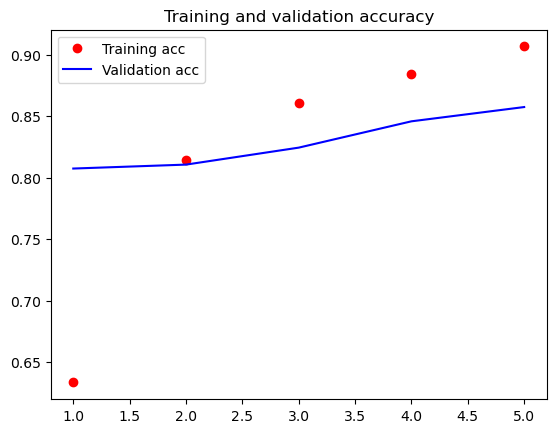

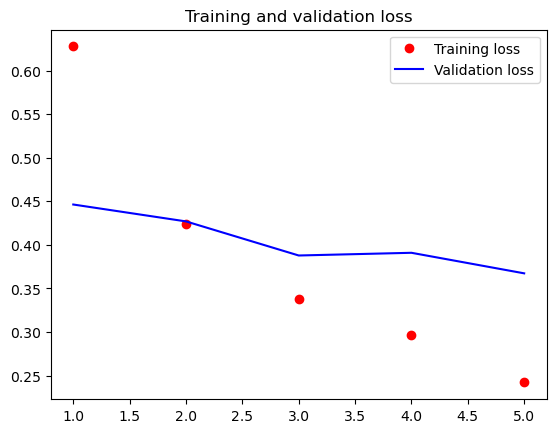

In [13]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#### Unfortunately, this small recurrent network doesn’t perform well compared to this baseline (86% validation accuracy). Part of the problem is that our inputs only consider the first 500 words, rather than full sequences—hence, theRNN has access to less information than the earlier baseline model.

#### The remainder of the problem is that SimpleRNN isn’t good at processing long sequences, such as text. Other types of recurrent layers perform much better. Let’s look at some more advanced layers.

## LSTM

In [14]:
# Define Model
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

# Compile Model
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])

# Fit Model
history = model.fit(input_train, y_train,
epochs=5,
batch_size=128,
validation_split=0.2)

Epoch 1/5
157/157 [==============================] - 150s 940ms/step - loss: 0.5907 - acc: 0.6779 - val_loss: 0.3921 - val_acc: 0.8416
Epoch 2/5
157/157 [==============================] - 144s 920ms/step - loss: 0.3620 - acc: 0.8511 - val_loss: 0.3211 - val_acc: 0.8704
Epoch 3/5
157/157 [==============================] - 145s 922ms/step - loss: 0.2914 - acc: 0.8844 - val_loss: 0.3930 - val_acc: 0.8504
Epoch 4/5
157/157 [==============================] - 144s 917ms/step - loss: 0.2503 - acc: 0.9007 - val_loss: 0.3503 - val_acc: 0.8624
Epoch 5/5
157/157 [==============================] - 147s 937ms/step - loss: 0.2299 - acc: 0.9121 - val_loss: 0.3336 - val_acc: 0.8710


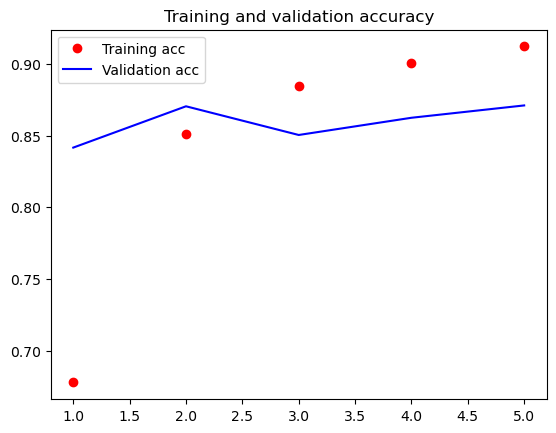

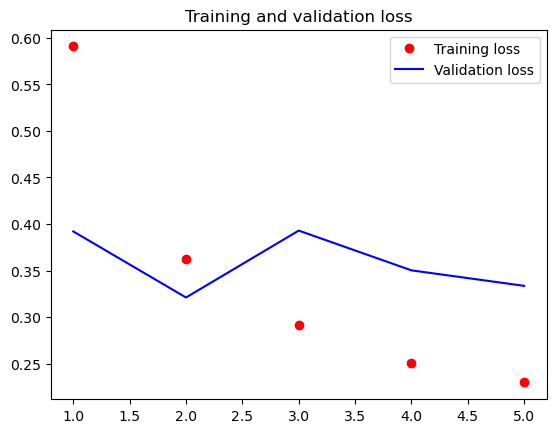

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#### This time, weachieved up to 87% validation accuracy. Not bad: certainly much better than the SimpleRNN network—that’s largely because LSTM suffers much less from the vanishing-gradient problem. We can further increase the accuracy by tuning hyperparameters such as dimensionality of embeddings or the LSTM output.